## Course Project

**Instructions:** <br>
a. In the course project, you will analyze a real-world dataset on credit card fraud detection. You will write a report on your data analysis using Jupyter Notebook. <br>
b. For each step, make sure to explain what you are doing, annotate your results, and provide your interpretation. <br>
c. When you finish, make sure to use `Kernel` -> `Restart and Run All` to restart the kernel and rerun the entire notebook to generate the desired outputs, before submitting your project report. <br>
d. Upload your .ipynb file to Canvas for grading. <br>
e. All questions related to the course project shall be posted in the Discussions section on Canvas. <br>
<br>

**Policy:** <br>
The course project is worth 25 points, counting towards 25% of the course final score. <br>

Late submission, empty submission or no submission receives 0 point. Please note that in order to pass the course, at least 30% of the total score for the project must be obtained. In case of special circumstances, email the instructor directly ahead of time. 

### Credit Card Fraud Detection
You can download the csv files from the project folder on Canvas.  <br>

#### Context
Credit card companies aim to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
The dataset contains transactions made by credit cards in September 2013 by european cardholders.
Transactions occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, as the positive class (frauds) account for 0.172% of all transactions. <br>

It contains numerical input variables V1-V28 which are the result of a Principal Component Analysis (PCA) transformation, as original features are not provided due to confidentiality issues. Features that have not been transformed with PCA are 'Time' and 'Amount'. 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' denotes the transaction Amount. 'Class' is the response variable (labelled outcome) and it takes value 1 in case of fraud and 0 otherwise.  <br>

### Module 1: Data Exploration
Load `creditcard_train.csv` and explore the dataset. How do the data look like? Are there any missing values? What do you do with missing values, i.e. removal, imputation, etc.?<br>
Are there any outliers? What do you do with outliers, i.e. drop them, explore the effects of outliers on models, etc.? <br>
Record your analysis procedures. For example, 20 observations are removed due to missingness, and 3,000 observations remain for further analysis. <br>

Hint: for removal of extreme outliers, consider: Q1=df.quantile(0.25); Q3=df.quantile(0.75); IQR=Q3-Q1; <br>
Remove samples that are smaller than Q1 - 2.5 * IQR or larger than Q3 + 2.5 * IQR.

<h4>Importing Libraries</h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
%matplotlib inline

<h4>Loading the Data</h4>

In [ ]:
creditcard_train = pd.read_csv('creditcard_train.csv')

<h4>Exploring the Data</h4>

In [ ]:
creditcard_train.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [ ]:
num_rows = creditcard_train.shape[0]
print(f"There are {num_rows} transactions/rows in the given data.")

There are 284657 transactions/rows in the given data.


In [ ]:
print(f"There are {creditcard_train.shape[1]} columns in the given data.")

There are 31 columns in the given data.


In [ ]:
num_fraud = creditcard_train[creditcard_train['Class'] == 1].shape[0]
print(f"Out of {num_rows} transactions, {num_fraud} ({num_fraud * 100 / num_rows}%) are fraud.")

Out of 284657 transactions, 442 (0.15527459363374166%) are fraud.


Since the fraud percentage is very low, we can say that the data is highly unbalanced.

<h4>Handling Missing Values</h4>

In [ ]:
num_missing = sum(creditcard_train.isnull().values.any(axis=1))
print(f"There are {num_missing} missing values.")

There are 798 missing values.


In [ ]:
print(f"That is {num_missing * 100 / num_rows}% of the total database.")

That is 0.2803373885061671% of the total database.


Since that is just 0.28%, and hence negligible, we can remove these rows.

In [ ]:
creditcard_train.dropna(axis=0, inplace=True)

In [ ]:
num_rows = creditcard_train.shape[0]
print(f"There are now {num_rows} rows left in the data.")

There are now 283859 rows left in the data.


In [ ]:
num_fraud = creditcard_train[creditcard_train['Class'] == 1].shape[0]
print(f"After dropping the rows, there are {num_fraud} fraud transactions.")

After dropping the rows, there are 442 fraud transactions.


Luckily, we did not drop any fraud transaction while dropping the rows with missing values, and hence, it was a good decision to drop them.

<h4>Dropping Outliers</h4>

In [ ]:
fraud_data = creditcard_train[creditcard_train['Class'] == 1]
real_data = creditcard_train[creditcard_train['Class'] == 0]
features = creditcard_train.columns.values[1: 30]
for f in features:
    desc_fraud = fraud_data[f].describe()
    lower_bound_fraud = desc_fraud[4] - 2.5 * (desc_fraud[6] - desc_fraud[4])
    upper_bound_fraud = desc_fraud[4] + 2.5 * (desc_fraud[6] - desc_fraud[4])
    
    desc_real = real_data[f].describe()
    lower_bound_real = desc_real[4] - 2.5 * (desc_real[6] - desc_real[4])
    upper_bound_real = desc_real[4] + 2.5 * (desc_real[6] - desc_real[4])
    
    creditcard_train.drop(creditcard_train[(((creditcard_train[f] < lower_bound_fraud) | 
                                             (creditcard_train[f] > upper_bound_fraud)) & 
                                            (creditcard_train['Class'] == 1)) | 
                                           (((creditcard_train[f] < lower_bound_real) |
                                            (creditcard_train[f] > upper_bound_real)) &
                                           (creditcard_train['Class'] == 0)
                                           )].index, inplace=True)

In [ ]:
nums_rows = creditcard_train.shape[0]
nums_fraud = creditcard_train[creditcard_train['Class'] == 1].shape[0]
print(f"There are now {nums_fraud} fraud transactions, out of {nums_rows} total transactions/ rows, which is {nums_fraud * 100 / nums_rows}%.")
print(f"{(283859 - nums_rows) * 100 / 283859}% rows have been dropped as outlier.")

There are now 258 fraud transactions, out of 167999 total transactions/ rows, which is 0.15357234269251602%.
40.81603894891478% rows have been dropped as outlier.


The fraud percentage is relatively unchanged even after removing the outliers.

### Module 2: Data Visualization
What are the distributions of variables? Are the variables distributed differently in the Fraud group and in the Normal group? Use tables and/or figures to visualize your exploration and findings. Present no more than 5 figures/tables that you think are important, and you may state in your findings that other variables a, b, c have similar patterns.

<h4>Graph 1</h4>

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


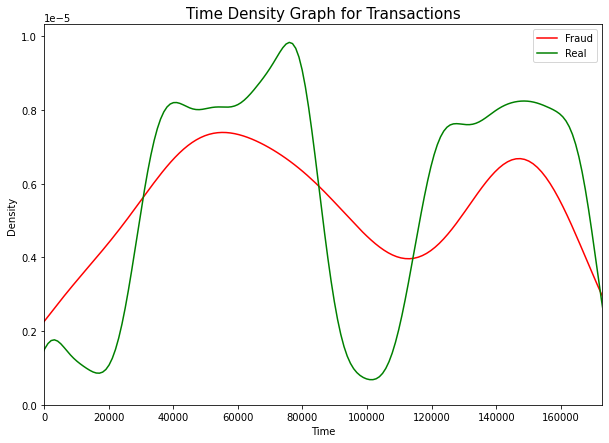

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(creditcard_train[creditcard_train['Class'] == 1]["Time"], color='r', hist=False, label='Fraud')
sns.distplot(creditcard_train[creditcard_train['Class'] == 0]["Time"], color='g', hist=False, label='Real')
plt.xlim([0, creditcard_train['Time'].max()])
plt.title('Time Density Graph for Transactions', fontsize=15)
plt.legend()
plt.show()

<h4>Graph 2</h4>

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

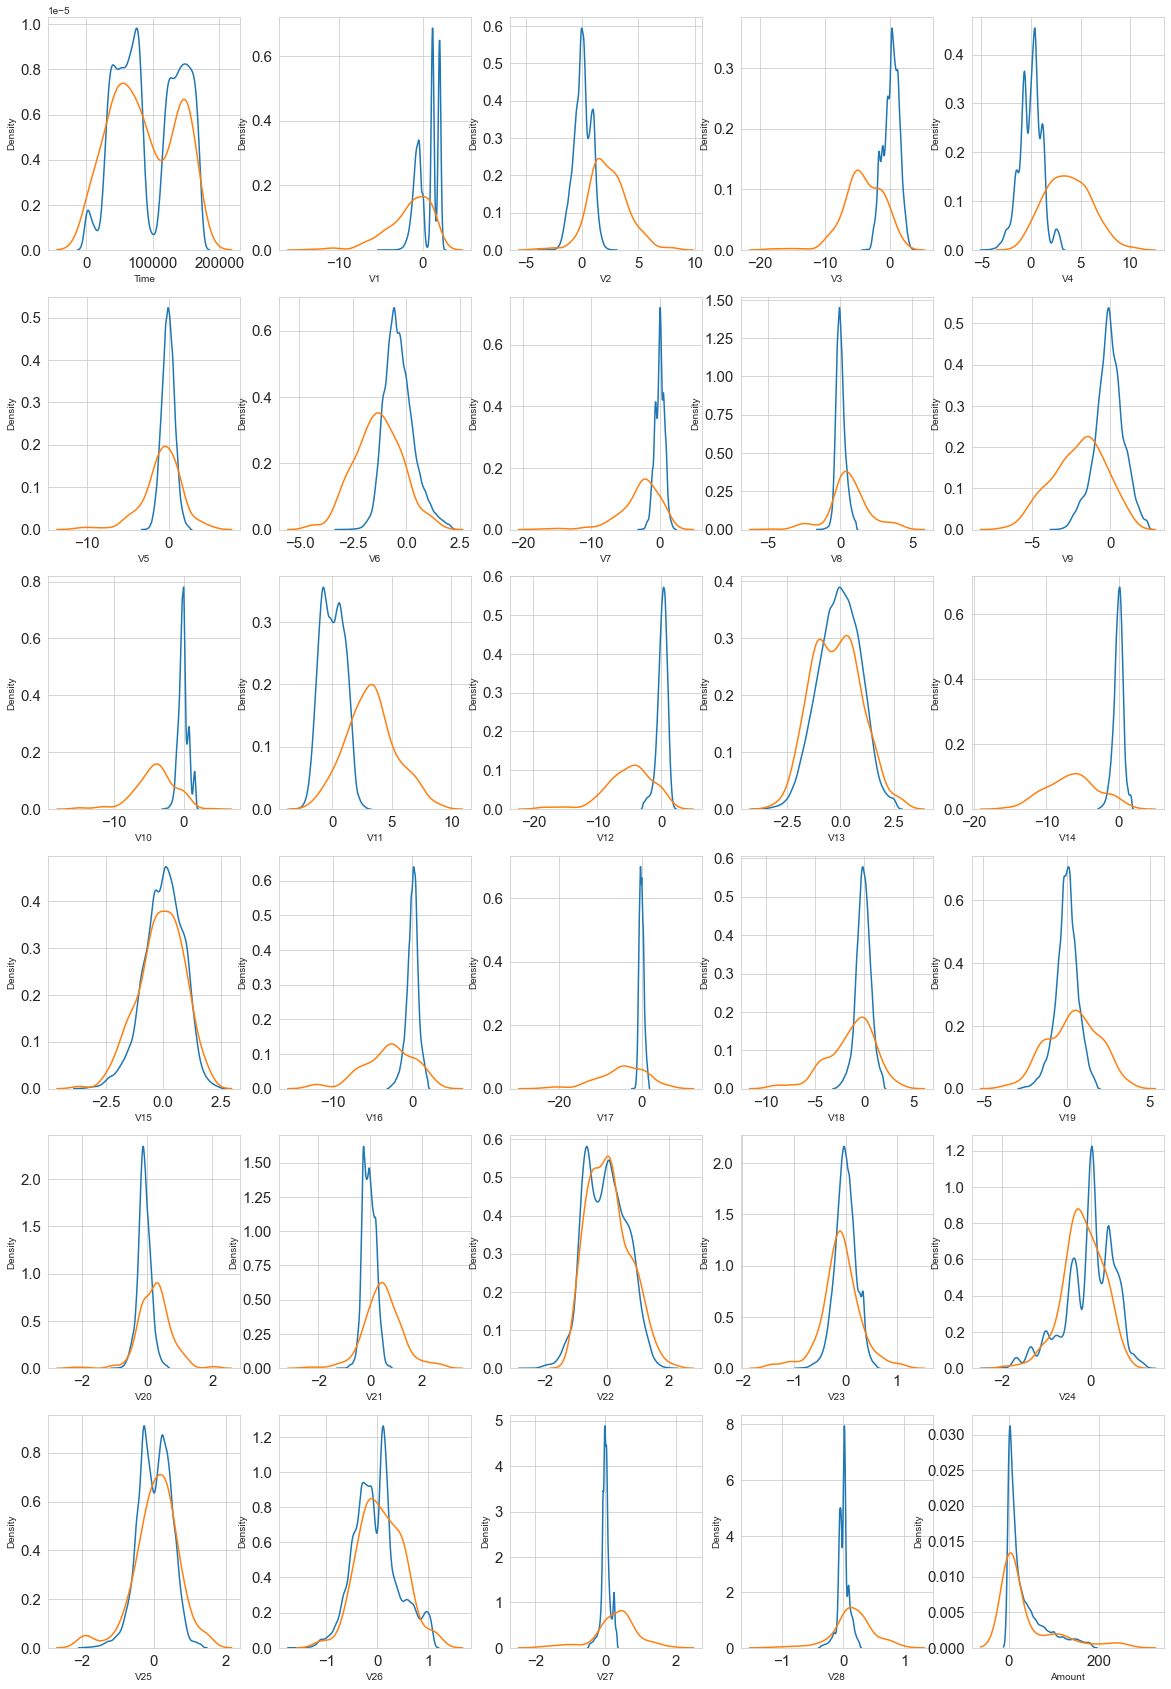

In [ ]:
real_class = creditcard_train.loc[creditcard_train['Class'] == 0]
fraud_class = creditcard_train.loc[creditcard_train['Class'] == 1]
counter = 0
sns.set_style('whitegrid')
fix, ax = plt.subplots(6, 5, figsize=(20, 30))
for feature in creditcard_train.columns.values[0:30]:
    counter += 1
    plt.subplot(6, 5, counter)
    sns.distplot(real_class[feature], label='Real Class', hist=False)
    sns.distplot(fraud_class[feature], label='Fraud Class', hist=False)
    plt.xlabel(feature)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
plt.show()

<h4>Graph 3</h4>

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribition of Amount')

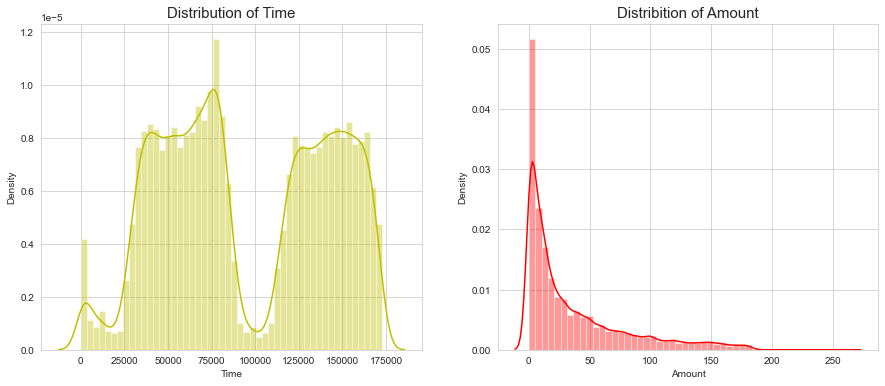

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1 = sns.distplot(creditcard_train['Time'], ax=ax1, color='y')
ax2 = sns.distplot(creditcard_train['Amount'], ax=ax2, color='r')
ax1.set_title('Distribution of Time', fontsize=15)
ax2.set_title('Distribition of Amount', fontsize=15)

<h4>Graph 4</h4>

<Figure size 7200x3600 with 0 Axes>

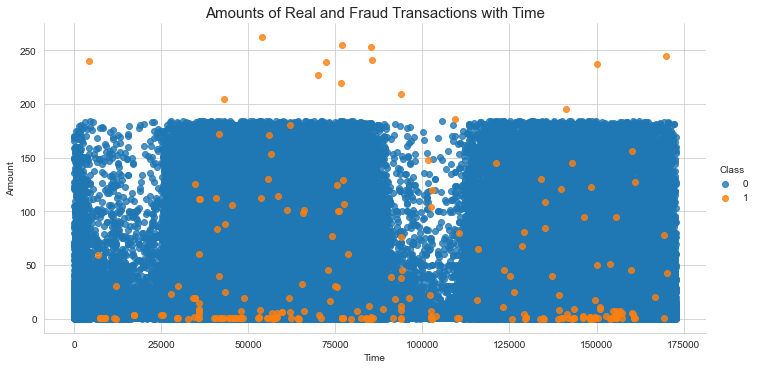

In [ ]:
plt.figure(figsize=(18, 9), dpi=400)
sns.lmplot(y="Amount", x="Time", data=creditcard_train, hue='Class', fit_reg=False, aspect=2, scatter_kws={'alpha': 0.8})
plt.title("Amounts of Real and Fraud Transactions with Time", fontsize=15)
plt.show()

<h4>Graph 5</h4>

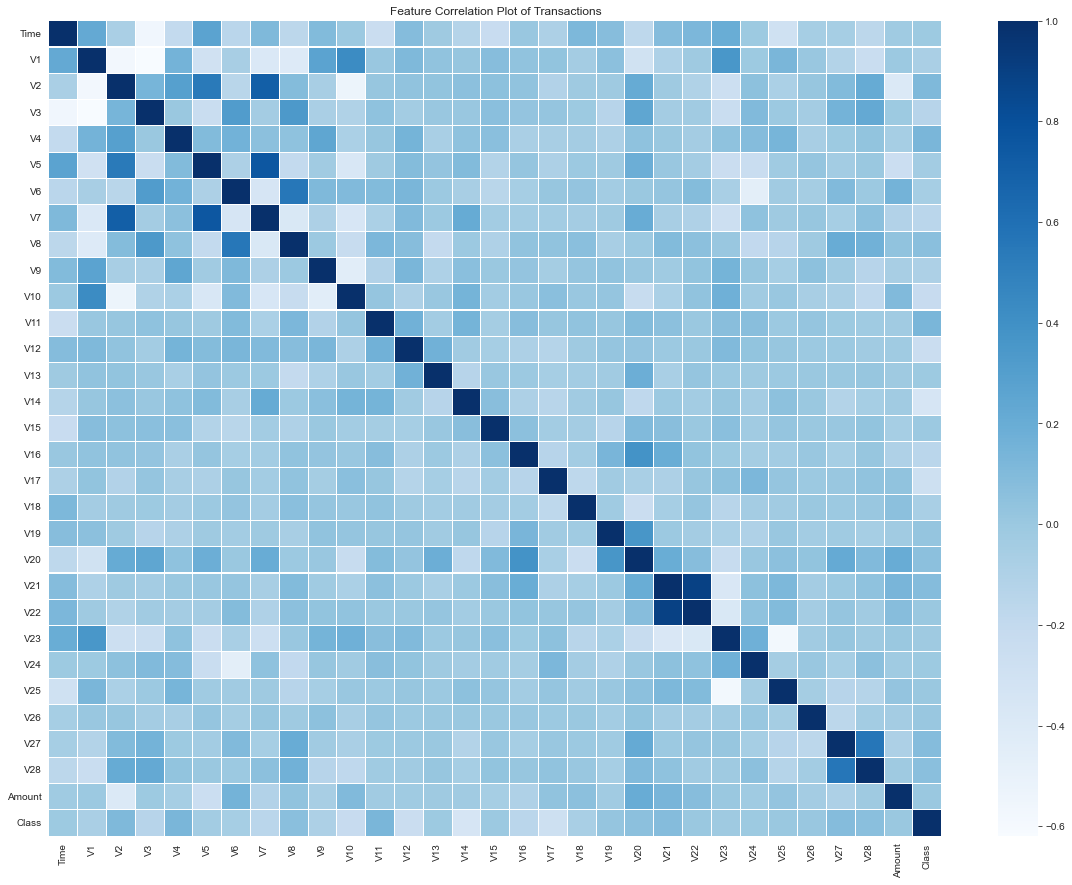

In [ ]:
plt.figure(figsize=(20, 15))
corr = creditcard_train.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels=corr.columns, linewidths=0.1, cmap='Blues')
plt.title('Feature Correlation Plot of Transactions')
plt.show()

### Module 3: Dimension Reduction
Apply unsupervised learning methods to achieve dimension reduction. Visualize and interpret the results. Any dimension reduction algorithms can be used.

<h4>K-Means Clustering</h4>

In [ ]:
df_PCA = creditcard_train.copy().drop(['Class'], axis=1)

In [ ]:
scale = StandardScaler().fit(df_PCA)
scaled_data = scale.transform(df_PCA)

In [ ]:
k_means = KMeans(n_clusters=2, random_state=1).fit(scaled_data)

In [ ]:
print(f"The clusters are: {k_means.labels_}")
print(f"The intertia is: {k_means.inertia_}")

The clusters are: [0 1 0 ... 1 0 0]
The intertia is: 4589168.453990063


<h4>Optimum number of clusters</h4>

In [ ]:
inertia_list = list()

In [ ]:
df_k_means = creditcard_train.copy().drop(['Class'], axis=1)
for i in range(2, 21):
    k_means_1 = KMeans(n_clusters=i, random_state=1).fit(df_k_means)
    inertia_list.append(k_means_1.inertia_)
    print(f"The inertia for having {i} clusters is {inertia_list[i - 2]}.")

The inertia for having 2 clusters is 63167767430906.07.
The inertia for having 3 clusters is 34373882092306.72.
The inertia for having 4 clusters is 18729902093314.457.
The inertia for having 5 clusters is 12821731565175.49.
The inertia for having 6 clusters is 9330872850115.639.
The inertia for having 7 clusters is 6244060291504.517.
The inertia for having 8 clusters is 4907474172427.076.
The inertia for having 9 clusters is 3821554421654.0303.
The inertia for having 10 clusters is 3193180158790.919.
The inertia for having 11 clusters is 2659542057586.778.
The inertia for having 12 clusters is 2229396531823.8984.
The inertia for having 13 clusters is 1931838779695.7168.
The inertia for having 14 clusters is 1677238767198.8464.
The inertia for having 15 clusters is 1487691911362.954.
The inertia for having 16 clusters is 1322921169028.2148.
The inertia for having 17 clusters is 1174416158465.7456.
The inertia for having 18 clusters is 1049809607495.9574.
The inertia for having 19 clust

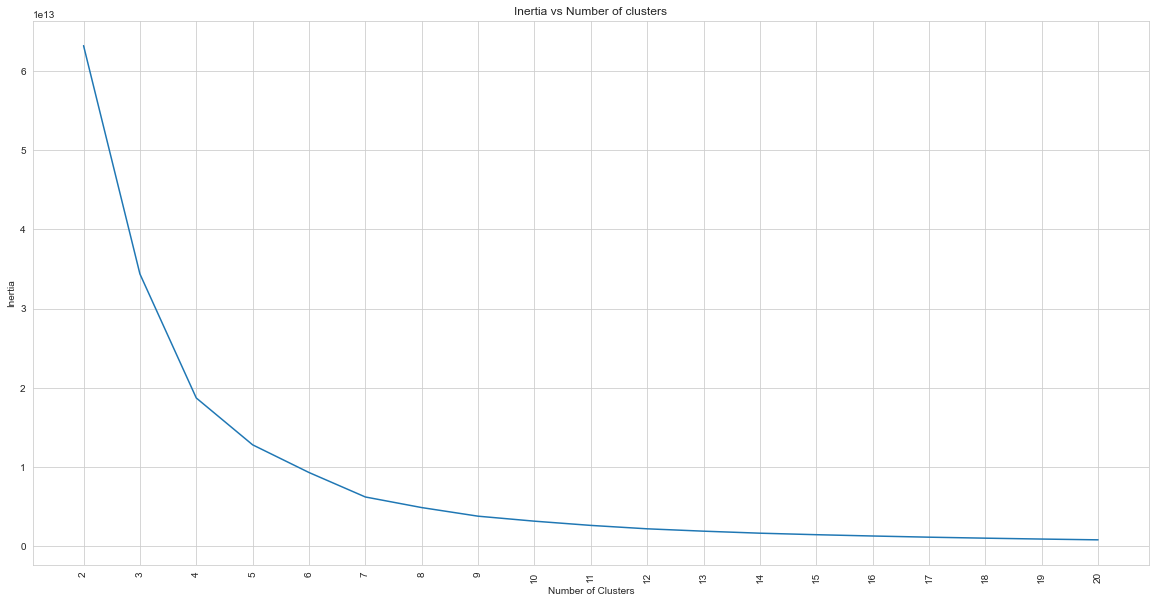

In [ ]:
num_clusters = [i for i in range(2, 21)]
fig, (ax1) = plt.subplots(1, figsize=(20,10))
a = np.arange(len(num_clusters))
ax1.plot(a, inertia_list)
ax1.set_xticks(a)
ax1.set_xticklabels(num_clusters, rotation='vertical')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of clusters');

We want intertia to be lower for more coherency, so we will choose number of clusters = 7, as it is when inertia falls down below 1.

In [ ]:
k_means_1 = KMeans(n_clusters=7, random_state=5).fit(df_k_means)

predictions = k_means_1.predict(df_k_means)

unique, cnts = np.unique(predictions, return_counts=True)
cnts = cnts.reshape(1, 7)

df_cnts = pd.DataFrame(cnts, columns=[f"Cluster {x}" for x in range(1, 8)])
print(df_cnts)

   Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5  Cluster 6  Cluster 7
0      25774      28357      23950      30477       5397      27714      26330


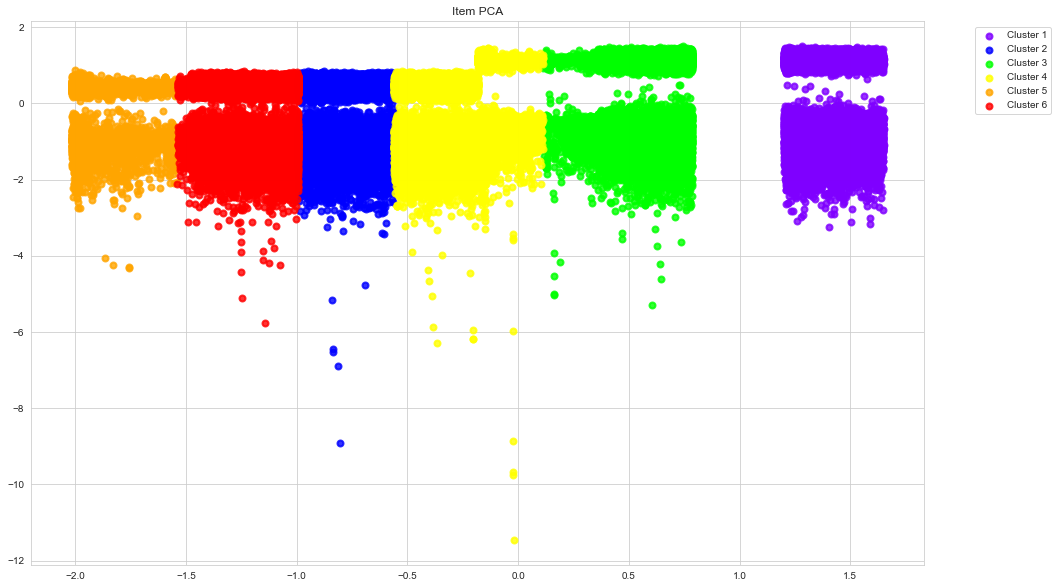

In [ ]:
graph_colours = ['#7f00ff', '#0000ff', '#00ff00', '#ffff00', '#ffa500', '#ff0000']

plt.figure(figsize=(16, 10))
for c, i, n in zip(graph_colours, [num for num in range(0, 6)], [f"Cluster {x}" for x in range(1, 7)]):
    plt.scatter(scaled_data[predictions == i, 0], scaled_data[predictions == i, 1], color=c, alpha=0.8, lw=2, label=n)

plt.legend(loc='best', shadow=True, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.title("Item PCA")
plt.show()

### Module 4: Classification
Choose three classification methods and build classification models, using 5-fold cross-validation. <br>

Further, load `creditcard_test.csv` and use it as the test dataset to evaluate your models and compare their performance. Consider visualizing the results, and evaluate the results using metrics such as the overall accuracy and the confusion matrix. <br>

Hint: because the dataset is highly unbalanced, consider undersampling, i.e. randomly select N normal observations of the same size as the N fraud observations, and use N+N=2N samples for model fitting and training. 

In [ ]:
###pick 3 classification methods, and methods not in the below list can also be used; you can also pick more than three methods
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

<h4>Undersampling</h4>

In [ ]:
from sklearn.preprocessing import StandardScaler
creditcard_train['NormAmount'] = StandardScaler().fit_transform(creditcard_train['Amount'].values.reshape(-1,1))
X_train = creditcard_train.drop(['Amount', 'Class', 'Time'], axis=1)
Y_train = creditcard_train['Class']

In [ ]:
num_fraud = len(creditcard_train[creditcard_train['Class'] == 1])
real_df = creditcard_train[creditcard_train['Class'] == 0].sample(num_fraud, random_state = 8)
undersample_df = real_df.append(creditcard_train[creditcard_train['Class'] == 1], sort=False).reset_index(drop = True)
print(f"There are {undersample_df[undersample_df.Class == 0].shape[0] * 100/undersample_df.shape[0]}% real transactions and {undersample_df[undersample_df.Class == 1].shape[0] * 100/undersample_df.shape[0]}% fraud transactions.")

There are 50.0% real transactions and 50.0% fraud transactions.


In [ ]:
x_under = undersample_df.drop(['Class', 'Time', 'Amount'], axis=1)
y_under = undersample_df['Class']
print(f"Feature matrix: {x_under.shape}")
print(f"Target array: {y_under.shape}")

Feature matrix: (516, 29)
Target array: (516,)


<h4>Testing Dataset</h4>

In [ ]:
creditcard_test = pd.read_csv('creditcard_test.csv')
creditcard_test['NormAmount'] = StandardScaler().fit_transform(creditcard_test['Amount'].values.reshape(-1, 1))
X_test = creditcard_test.drop(['Amount','Class','Time'], axis=1)
Y_test = creditcard_test['Class']

In [ ]:
print(f"Feature Matrix for Testing: {X_test.shape}.")
print(f"Target Array for Testing {Y_test.shape}.")

Feature Matrix for Testing: (150, 29).
Target Array for Testing (150,).


<h4>Random Forest Classifier</h4>

In [ ]:
from sklearn.model_selection import GridSearchCV
random_forest_classified = GridSearchCV(RandomForestClassifier(), {'n_estimators': [50, 100, 300], 'max_depth': [5, 10, 20, 25], 'min_samples_split': [2, 6, 10, 20, 40]}, cv=5, return_train_score=False, n_jobs=-1, verbose=1)

In [ ]:
random_forest_classified.fit(x_under, y_under.values.ravel())

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 25],
                         'min_samples_split': [2, 6, 10, 20, 40],
                         'n_estimators': [50, 100, 300]},
             verbose=1)

In [ ]:
random_forest_classification_result = pd.DataFrame(random_forest_classified.cv_results_)
print(random_forest_classification_result)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.090073      0.006997         0.006863        0.003039   
1        0.167748      0.008366         0.011974        0.002914   
2        0.590547      0.022661         0.026014        0.006769   
3        0.087242      0.002599         0.005714        0.003304   
4        0.230231      0.050276         0.012737        0.004044   
5        0.499568      0.006822         0.025988        0.000966   
6        0.085559      0.004658         0.006853        0.004255   
7        0.164321      0.002732         0.007659        0.002045   
8        0.499413      0.016438         0.028421        0.002660   
9        0.083396      0.007673         0.007716        0.003057   
10       0.161420      0.006283         0.009718        0.003267   
11       0.553151      0.011614         0.029422        0.004357   
12       0.094840      0.013411         0.009276        0.001448   
13       0.189462      0.007419         0.011399

In [ ]:
print(f"The best parameters are {random_forest_classified.best_params_}")
print(f"The best score is {random_forest_classified.best_score_}")

The best parameters are {'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 100}
The best score is 0.9515123226288275


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


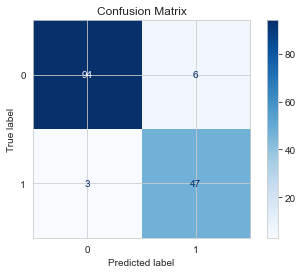

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(random_forest_classified, X_test.values, Y_test.values, cmap='Blues');
plt.title('Confusion Matrix');

In [ ]:
from sklearn.metrics import roc_auc_score
best_est = random_forest_classified.best_estimator_
pred = best_est.predict(X_test)
print(f"The ROC AUC Score is {roc_auc_score(Y_test, pred)}")

The ROC AUC Score is 0.94


<h4>Support Vector Classifier</h4>

In [ ]:
support_vector_classifier = GridSearchCV(SVC(random_state=1), {'C':[0.1,2,8,50,150,250],'kernel':['poly', 'sigmoid'],'gamma':[1,0.1,0.01,0.001]}, cv=5, return_train_score=False, n_jobs=-1, verbose=1).fit(x_under, y_under.values.ravel())

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
print(pd.DataFrame(support_vector_classifier.cv_results_))

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.004518      0.001380         0.001446        0.000229     0.1   
1        0.005197      0.000325         0.001710        0.000037     0.1   
2        0.003312      0.000384         0.001404        0.000331     0.1   
3        0.005125      0.002023         0.001968        0.000803     0.1   
4        0.004958      0.000762         0.002461        0.001082     0.1   
5        0.005476      0.001166         0.002181        0.000658     0.1   
6        0.007786      0.001504         0.002800        0.001080     0.1   
7        0.008293      0.001890         0.002078        0.000098     0.1   
8        0.004356      0.002472         0.001190        0.000098       2   
9        0.004759      0.000135         0.002310        0.001526       2   
10       0.003789      0.001014         0.001252        0.000093       2   
11       0.004188      0.001850         0.001480        0.000373       2   
12       0.0

In [ ]:
print(f"The best parameters are {support_vector_classifier.best_params_}")
print(f"The best score is {support_vector_classifier.best_score_}")

The best parameters are {'C': 2, 'gamma': 0.1, 'kernel': 'poly'}
The best score is 0.945724421209858


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


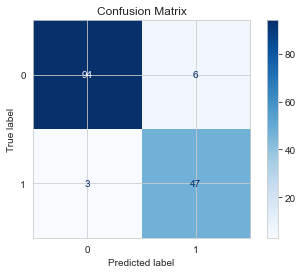

In [ ]:
plot_confusion_matrix(support_vector_classifier, X_test.values, Y_test.values, cmap='Blues');
plt.title('Confusion Matrix');

In [ ]:
best_est = support_vector_classifier.best_estimator_
pred = best_est.predict(X_test)
print(f"The ROC AUC Score is {roc_auc_score(Y_test, pred)}")

The ROC AUC Score is 0.94


<h4>Guassian Process Classifier</h4>

In [ ]:
guassian_process_classifier = GridSearchCV(GaussianProcessClassifier(random_state=1), {'multi_class': ['one_vs_rest', 'one_vs_one']}, cv=5, n_jobs=-1, return_train_score=False).fit(x_under, y_under.values.ravel())

In [ ]:
print(pd.DataFrame(guassian_process_classifier.cv_results_))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.103032      0.006866         0.004459        0.002051   
1       0.068390      0.023647         0.003398        0.003175   

  param_multi_class                          params  split0_test_score  \
0       one_vs_rest  {'multi_class': 'one_vs_rest'}           0.971154   
1        one_vs_one   {'multi_class': 'one_vs_one'}           0.971154   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0            0.92233           0.902913           0.932039           0.970874   
1            0.92233           0.902913           0.932039           0.970874   

   mean_test_score  std_test_score  rank_test_score  
0         0.939862         0.02711                1  
1         0.939862         0.02711                1  


In [ ]:
print(f"The best parameters are {guassian_process_classifier.best_params_}")
print(f"The best score is {guassian_process_classifier.best_score_}")

The best parameters are {'multi_class': 'one_vs_rest'}
The best score is 0.9398618371919344


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but GaussianProcessClassifier was fitted with feature names
  warnings.warn(


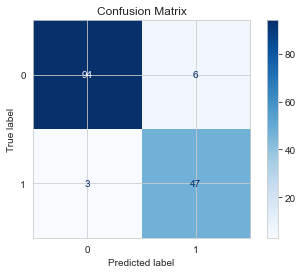

In [ ]:
plot_confusion_matrix(guassian_process_classifier, X_test.values, Y_test.values, cmap='Blues');
plt.title('Confusion Matrix');

In [ ]:
best_est = guassian_process_classifier.best_estimator_
pred = best_est.predict(X_test)
print(f"The ROC AUC Score is {roc_auc_score(Y_test, pred)}")

The ROC AUC Score is 0.94


### Module 5: Summary
Summarize your findings and draw conclusions.

<h3>Module 1</h3>

When the dataset was first loaded, there were 284657 transactions/rows in the data. Among these, 442 were fraud transactions with the class column having the value 1. There were 798 rows with missing values, and when removed, 283859 rows remained. No fraud transaction row was removed during that. After this, I also removed the outliers, after which 258 fraud transactions remained, out of 167999 total rows that remained. The percentage of fraud transactions remained pretty much the same so we do not really lose a lot of information by removing the outliers, and hence we continue with the reduced dataset.

<h3> Module 2</h3>

The first graph shows the density of transactions with time.

The second has a separate visualisation for each column of the data, plotting the real and fraud transactions.

The third graph has two visualisations: One is of distribution of time, the other has distribution of amount. From here we get to see that the transactions were of small amounts.

From the first look at the 4th graph, we get a clear idea that the number of real transactions (blue) is way more than fraud (orange). It's a plot of time vs number of transactions of each kind.

The heatmap in the 5th graph tells that there is barely any corelation between most of the features.

<h3>Module 3</h3>

I first performed k-means clustering. After that, I calculated inertia that would be there for each number of clusters, and chose the number which brings intertia below 1.

<h3>Module 4</h4>

After doing undersampling, I used the three classifiers as follows:
1. Random Forest Classifier (AUC: 0.93)
2. Support Vector Classifier (AUC: 0.94)
3. Guassian Process Classifer (AUC: 0.94)
For each classifer, I have also drawn the confusion matrix. 
Among these, Support Vector and Guassian Process gave the same results, and even the same confusion matrix.

<h1>Project by Aarnav Gupta</h1>